In [1]:

# GetAround - Analyse Exploratoire des Prix
# Notebook 2: EDA sur les données de pricing pour ML
# Auteur: Data Science Bootcamp Student

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

print("💰 GetAround - Analyse Exploratoire des Prix (ML)")
print("=" * 60)

💰 GetAround - Analyse Exploratoire des Prix (ML)


In [2]:
# ============================================================================
# 1. CHARGEMENT ET INSPECTION INITIALE
# ============================================================================

print("📁 1. CHARGEMENT DES DONNÉES DE PRICING")
print("-" * 40)

# Chargement du CSV
df_pricing = pd.read_csv('get_around_pricing_project.csv')

# Suppression de la colonne index si elle existe
if 'Unnamed: 0' in df_pricing.columns:
    df_pricing = df_pricing.drop('Unnamed: 0', axis=1)

print(f"✅ Données chargées: {df_pricing.shape[0]} voitures, {df_pricing.shape[1]} caractéristiques")

# Aperçu des données
print("\n📋 Aperçu des données:")
print(df_pricing.head())

print("\n📊 Informations sur les colonnes:")
print(df_pricing.info())

print("\n📈 Statistiques descriptives:")
print(df_pricing.describe())

📁 1. CHARGEMENT DES DONNÉES DE PRICING
----------------------------------------
✅ Données chargées: 4843 voitures, 14 caractéristiques

📋 Aperçu des données:
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       T

In [3]:
# ============================================================================
# 2. ANALYSE DE LA VARIABLE TARGET (PRIX)
# ============================================================================

print("\n💰 2. ANALYSE DE LA VARIABLE TARGET (PRIX)")
print("-" * 40)

# Statistiques des prix
price_stats = df_pricing['rental_price_per_day'].describe()
print("📈 Statistiques des prix (€/jour):")
print(price_stats)

# Détection des outliers
Q1 = df_pricing['rental_price_per_day'].quantile(0.25)
Q3 = df_pricing['rental_price_per_day'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_pricing[
    (df_pricing['rental_price_per_day'] < lower_bound) | 
    (df_pricing['rental_price_per_day'] > upper_bound)
]

print(f"\n🎯 Analyse des outliers:")
print(f"Seuil inférieur: {lower_bound:.2f}€")
print(f"Seuil supérieur: {upper_bound:.2f}€")
print(f"Nombre d'outliers: {len(outliers)} ({len(outliers)/len(df_pricing)*100:.1f}%)")

# Visualisation de la distribution des prix
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribution des Prix (€/jour)', 'Box Plot avec Outliers', 
                   'Distribution Log-Transformée', 'Évolution Prix par Déciles'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Histogramme avec labels
fig.add_trace(
    go.Histogram(x=df_pricing['rental_price_per_day'], nbinsx=50, name='Fréquence'),
    row=1, col=1
)

# 2. Box plot avec annotations
fig.add_trace(
    go.Box(y=df_pricing['rental_price_per_day'], name='Prix Distribution'),
    row=1, col=2
)

# 3. Distribution log avec labels
log_prices = np.log(df_pricing['rental_price_per_day'])
fig.add_trace(
    go.Histogram(x=log_prices, nbinsx=50, name='Fréquence Log'),
    row=2, col=1
)

# 4. Déciles avec annotations
deciles = [df_pricing['rental_price_per_day'].quantile(i/10) for i in range(11)]
fig.add_trace(
    go.Scatter(x=list(range(11)), y=deciles, mode='lines+markers', 
              name='Prix par Décile', line=dict(width=3)),
    row=2, col=2
)

# Mise à jour des axes avec labels
fig.update_xaxes(title_text="Prix (€/jour)", row=1, col=1)
fig.update_yaxes(title_text="Nombre de voitures", row=1, col=1)

fig.update_yaxes(title_text="Prix (€/jour)", row=1, col=2)

fig.update_xaxes(title_text="Log(Prix)", row=2, col=1)
fig.update_yaxes(title_text="Fréquence", row=2, col=1)

fig.update_xaxes(title_text="Déciles (0=min, 10=max)", row=2, col=2)
fig.update_yaxes(title_text="Prix (€/jour)", row=2, col=2)

# Annotations importantes
fig.add_annotation(x=104, y=0, text=f"Médiane: 104€", 
                  showarrow=True, row=1, col=1)
fig.add_annotation(x=184, y=0, text=f"Seuil outliers: 184€", 
                  showarrow=True, row=1, col=1)

fig.update_layout(height=800, showlegend=False, 
                 title_text="Analyse Complète de la Distribution des Prix - GetAround")
fig.show()

# Ajout d'interprétations textuelles
print("\n📊 INTERPRÉTATION DES GRAPHIQUES:")
print("=" * 50)

print(f"📈 1. DISTRIBUTION PRINCIPALE:")
print(f"   • Forme: Asymétrique droite (queue longue vers prix élevés)")
print(f"   • Mode: ~{df_pricing['rental_price_per_day'].mode().iloc[0]:.0f}€ (prix le plus fréquent)")
print(f"   • Médiane: {df_pricing['rental_price_per_day'].median():.0f}€ (milieu de distribution)")
print(f"   • Moyenne: {df_pricing['rental_price_per_day'].mean():.0f}€ (tirée vers le haut par outliers)")

print(f"\n📦 2. BOX PLOT:")
print(f"   • Q1 (25%): {Q1:.0f}€")
print(f"   • Médiane (50%): {df_pricing['rental_price_per_day'].median():.0f}€") 
print(f"   • Q3 (75%): {Q3:.0f}€")
print(f"   • IQR: {IQR:.0f}€ (écart interquartile)")
print(f"   • Outliers: {len(outliers)} voitures ({len(outliers)/len(df_pricing)*100:.1f}%)")

print(f"\n🔄 3. TRANSFORMATION LOG:")
log_mean = np.log(df_pricing['rental_price_per_day']).mean()
log_std = np.log(df_pricing['rental_price_per_day']).std()
print(f"   • Plus symétrique après log-transformation")
print(f"   • Log-moyenne: {log_mean:.2f} → {np.exp(log_mean):.0f}€")
print(f"   • Indique distribution log-normale typique des prix")

print(f"\n📈 4. DÉCILES (Inégalité des Prix):")
for i in [1, 5, 9]:
    print(f"   • D{i}: {deciles[i]:.0f}€ ({i*10}% des voitures ≤ ce prix)")

acceleration = deciles[9] / deciles[1]  # Ratio D9/D1
print(f"   • Inégalité: Top 10% gagne {acceleration:.1f}x plus que Bottom 10%")

# Test de normalité
shapiro_stat, shapiro_p = stats.shapiro(df_pricing['rental_price_per_day'])
print(f"\n🧪 Test de normalité Shapiro-Wilk:")
print(f"Statistique: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")
print(f"Distribution normale: {'Non' if shapiro_p < 0.05 else 'Oui'}")


💰 2. ANALYSE DE LA VARIABLE TARGET (PRIX)
----------------------------------------
📈 Statistiques des prix (€/jour):
count    4843.000000
mean      121.214536
std        33.568268
min        10.000000
25%       104.000000
50%       119.000000
75%       136.000000
max       422.000000
Name: rental_price_per_day, dtype: float64

🎯 Analyse des outliers:
Seuil inférieur: 56.00€
Seuil supérieur: 184.00€
Nombre d'outliers: 345 (7.1%)



📊 INTERPRÉTATION DES GRAPHIQUES:
📈 1. DISTRIBUTION PRINCIPALE:
   • Forme: Asymétrique droite (queue longue vers prix élevés)
   • Mode: ~114€ (prix le plus fréquent)
   • Médiane: 119€ (milieu de distribution)
   • Moyenne: 121€ (tirée vers le haut par outliers)

📦 2. BOX PLOT:
   • Q1 (25%): 104€
   • Médiane (50%): 119€
   • Q3 (75%): 136€
   • IQR: 32€ (écart interquartile)
   • Outliers: 345 voitures (7.1%)

🔄 3. TRANSFORMATION LOG:
   • Plus symétrique après log-transformation
   • Log-moyenne: 4.75 → 116€
   • Indique distribution log-normale typique des prix

📈 4. DÉCILES (Inégalité des Prix):
   • D1: 86€ (10% des voitures ≤ ce prix)
   • D5: 119€ (50% des voitures ≤ ce prix)
   • D9: 161€ (90% des voitures ≤ ce prix)
   • Inégalité: Top 10% gagne 1.9x plus que Bottom 10%

🧪 Test de normalité Shapiro-Wilk:
Statistique: 0.9504
P-value: 0.0000
Distribution normale: Non



🔢 3. ANALYSE DES VARIABLES NUMÉRIQUES
----------------------------------------

📊 Variable: mileage
Min: -64
Max: 1,000,376
Moyenne: 140,962.8
Médiane: 141,080.0
⚠️ Kilométrage négatif: 1
⚠️ Kilométrage >500k: 1

📊 Variable: engine_power
Min: 0
Max: 423
Moyenne: 129.0
Médiane: 120.0
⚠️ Puissance = 0: 1
⚠️ Puissance >400CV: 2

🔗 Corrélations avec le prix:
rental_price_per_day    1.000000
engine_power            0.625645
mileage                -0.448912
Name: rental_price_per_day, dtype: float64


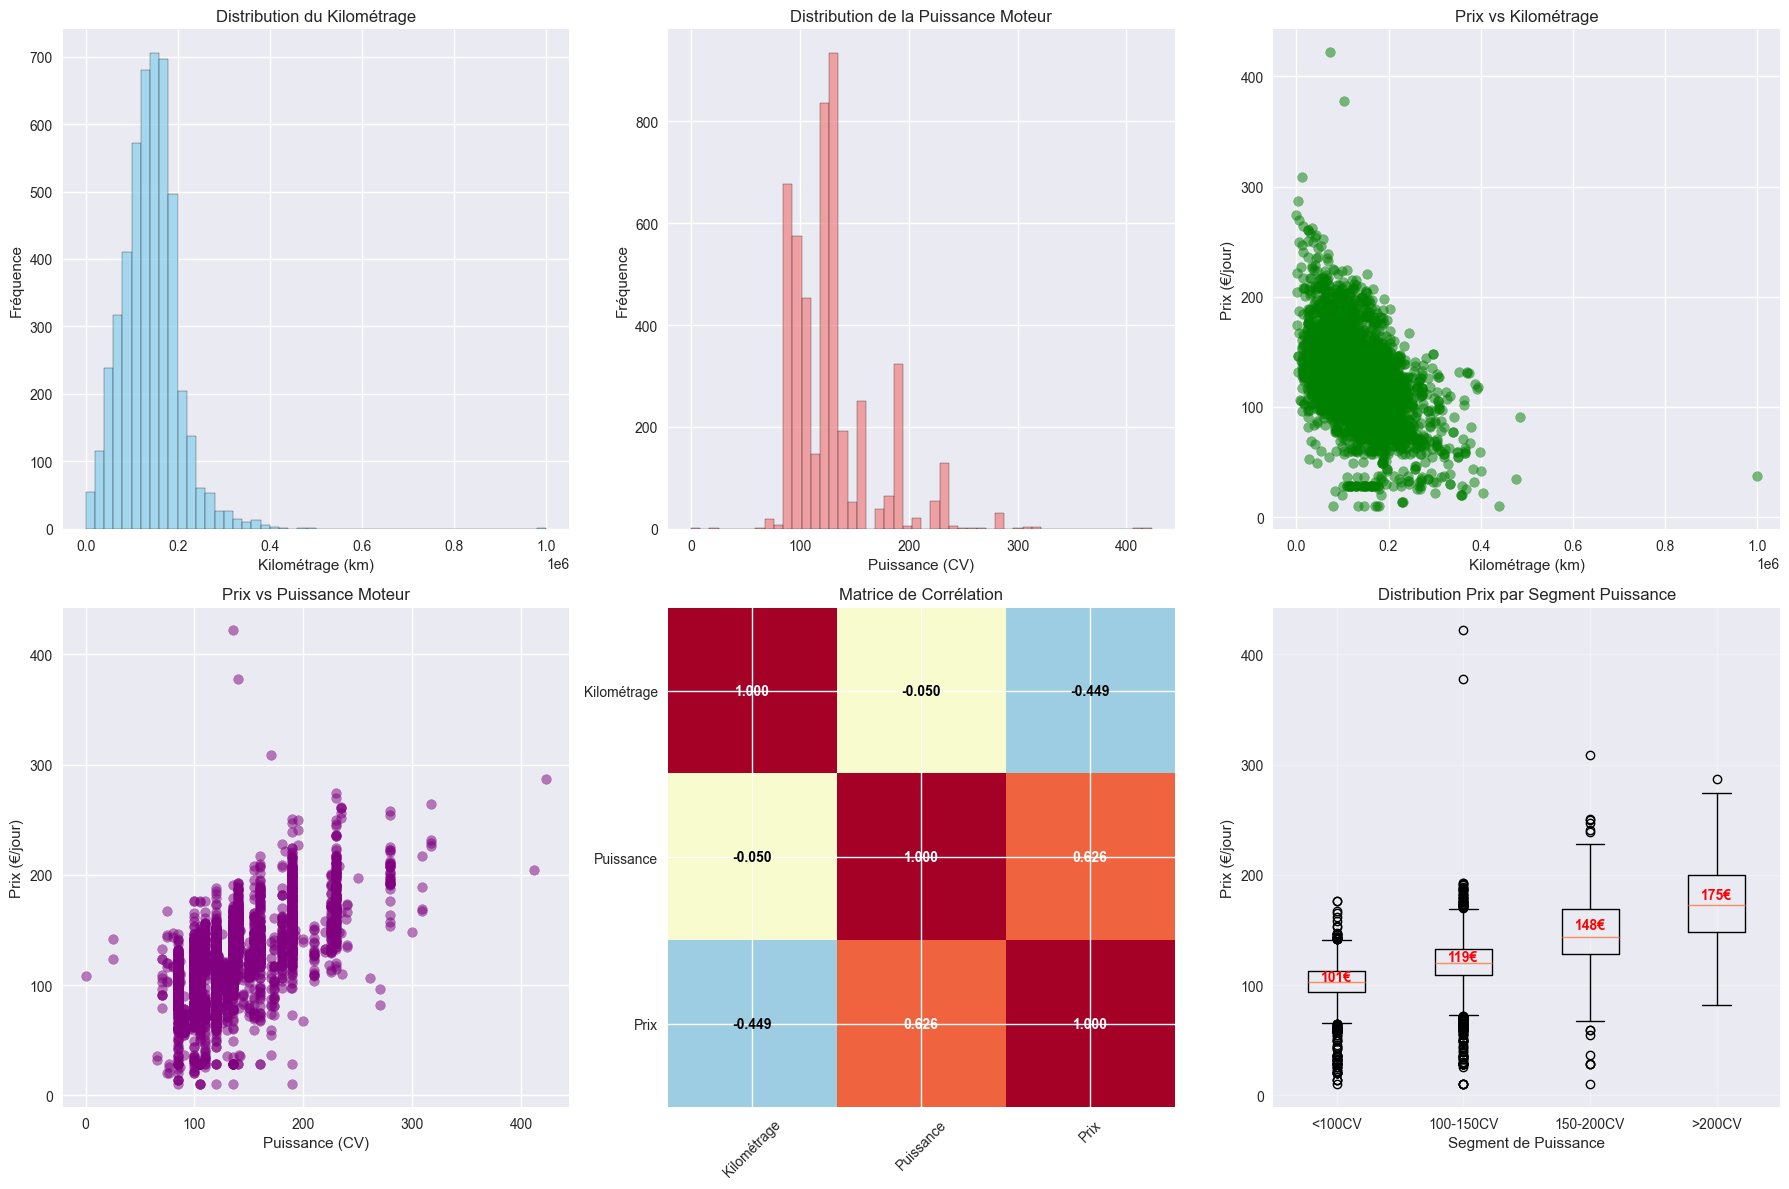


🔍 INSIGHTS:

📊 Matrice de Corrélation:
   • mileage ↔ engine_power: -0.050 (corrélation faible négative)
   • mileage ↔ rental_price_per_day: -0.449 (corrélation modérée négative)
   • engine_power ↔ rental_price_per_day: 0.626 (corrélation forte positive)

📈 Prix par Segment de Puissance:
   • <100CV: 101€ moyenne (1281 voitures)
   • 100-150CV: 119€ moyenne (2618 voitures)
   • 150-200CV: 148€ moyenne (684 voitures)
   • >200CV: 175€ moyenne (259 voitures)

💡 Impact Business:
   • Chaque CV supplémentaire = +0.54€/jour en moyenne
   • Upgrade 100CV → 200CV = +54€/jour potentiel


In [8]:
# ============================================================================
# 3. ANALYSE DES VARIABLES NUMÉRIQUES
# ============================================================================

print("\n🔢 3. ANALYSE DES VARIABLES NUMÉRIQUES")
print("-" * 40)

numeric_cols = ['mileage', 'engine_power']

for col in numeric_cols:
    print(f"\n📊 Variable: {col}")
    print(f"Min: {df_pricing[col].min():,}")
    print(f"Max: {df_pricing[col].max():,}")
    print(f"Moyenne: {df_pricing[col].mean():,.1f}")
    print(f"Médiane: {df_pricing[col].median():,.1f}")
    
    # Détection d'anomalies
    if col == 'mileage':
        negative_mileage = (df_pricing[col] < 0).sum()
        extreme_mileage = (df_pricing[col] > 500000).sum()
        print(f"⚠️ Kilométrage négatif: {negative_mileage}")
        print(f"⚠️ Kilométrage >500k: {extreme_mileage}")
    
    if col == 'engine_power':
        zero_power = (df_pricing[col] == 0).sum()
        extreme_power = (df_pricing[col] > 400).sum()
        print(f"⚠️ Puissance = 0: {zero_power}")
        print(f"⚠️ Puissance >400CV: {extreme_power}")

# Corrélation avec le prix
correlations = df_pricing[numeric_cols + ['rental_price_per_day']].corr()['rental_price_per_day'].sort_values(ascending=False)
print(f"\n🔗 Corrélations avec le prix:")
print(correlations)

# Visualisation des variables numériques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Kilométrage
axes[0,0].hist(df_pricing['mileage'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution du Kilométrage')
axes[0,0].set_xlabel('Kilométrage (km)')
axes[0,0].set_ylabel('Fréquence')

# Puissance moteur
axes[0,1].hist(df_pricing['engine_power'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution de la Puissance Moteur')
axes[0,1].set_xlabel('Puissance (CV)')
axes[0,1].set_ylabel('Fréquence')

# Prix vs Kilométrage
axes[0,2].scatter(df_pricing['mileage'], df_pricing['rental_price_per_day'], alpha=0.5, color='green')
axes[0,2].set_title('Prix vs Kilométrage')
axes[0,2].set_xlabel('Kilométrage (km)')
axes[0,2].set_ylabel('Prix (€/jour)')

# Prix vs Puissance
axes[1,0].scatter(df_pricing['engine_power'], df_pricing['rental_price_per_day'], alpha=0.5, color='purple')
axes[1,0].set_title('Prix vs Puissance Moteur')
axes[1,0].set_xlabel('Puissance (CV)')
axes[1,0].set_ylabel('Prix (€/jour)')

# Matrice de corrélation
numeric_cols = ['mileage', 'engine_power', 'rental_price_per_day']
correlation_matrix = df_pricing[numeric_cols].corr()

im = axes[1,1].imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1,1].set_xticks(range(len(numeric_cols)))
axes[1,1].set_yticks(range(len(numeric_cols)))
axes[1,1].set_xticklabels(['Kilométrage', 'Puissance', 'Prix'], rotation=45)
axes[1,1].set_yticklabels(['Kilométrage', 'Puissance', 'Prix'])
axes[1,1].set_title('Matrice de Corrélation')

# Ajouter les valeurs de corrélation
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        axes[1,1].text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}', 
                      ha='center', va='center', 
                      color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black',
                      fontweight='bold')

# NOUVEAU: Prix par segment de puissance (Box plot)
df_pricing['power_segment'] = pd.cut(df_pricing['engine_power'], 
                                    bins=[0, 100, 150, 200, float('inf')],
                                    labels=['<100CV', '100-150CV', '150-200CV', '>200CV'])

# Créer les données pour box plot
box_data = [df_pricing[df_pricing['power_segment'] == segment]['rental_price_per_day'].dropna() 
            for segment in ['<100CV', '100-150CV', '150-200CV', '>200CV']]

box_plot = axes[1,2].boxplot(box_data, labels=['<100CV', '100-150CV', '150-200CV', '>200CV'])
axes[1,2].set_title('Distribution Prix par Segment Puissance')
axes[1,2].set_xlabel('Segment de Puissance')
axes[1,2].set_ylabel('Prix (€/jour)')
axes[1,2].grid(True, alpha=0.3)

# Ajouter les moyennes sur le box plot
means = [data.mean() for data in box_data]
for i, mean in enumerate(means):
    axes[1,2].text(i+1, mean, f'{mean:.0f}€', ha='center', va='bottom', 
                   color='red', fontweight='bold')

plt.tight_layout()
plt.show()

# Afficher les insights des nouveaux graphiques
print("\n🔍 INSIGHTS:")
print("=" * 50)

print("\n📊 Matrice de Corrélation:")
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:  # Éviter les doublons
            corr_val = correlation_matrix.iloc[i, j]
            strength = "forte" if abs(corr_val) > 0.5 else "modérée" if abs(corr_val) > 0.3 else "faible"
            direction = "positive" if corr_val > 0 else "négative"
            print(f"   • {col1} ↔ {col2}: {corr_val:.3f} (corrélation {strength} {direction})")

print(f"\n📈 Prix par Segment de Puissance:")
for i, segment in enumerate(['<100CV', '100-150CV', '150-200CV', '>200CV']):
    count = len(box_data[i])
    mean_price = means[i]
    print(f"   • {segment}: {mean_price:.0f}€ moyenne ({count} voitures)")

# Calcul de l'impact business
price_increase_per_cv = correlation_matrix.loc['engine_power', 'rental_price_per_day'] * df_pricing['rental_price_per_day'].std() / df_pricing['engine_power'].std()
print(f"\n💡 Impact Business:")
print(f"   • Chaque CV supplémentaire = +{price_increase_per_cv:.2f}€/jour en moyenne")
print(f"   • Upgrade 100CV → 200CV = +{price_increase_per_cv * 100:.0f}€/jour potentiel")

In [16]:
# =============================================================================
# 4. DÉFINITION DES VARIABLES CATÉGORIELLES
# =============================================================================

categorical_vars = [
    'model_key',                    # Marque du véhicule
    'fuel',                        # Type de carburant
    'paint_color',                 # Couleur de peinture
    'car_type',                    # Type de véhicule
    'private_parking_available',   # Parking privé disponible
    'has_gps',                     # Présence GPS
    'has_air_conditioning',        # Climatisation
    'automatic_car',               # Boîte automatique
    'has_getaround_connect',       # Service GetAround Connect
    'has_speed_regulator',         # Régulateur de vitesse
    'winter_tires'                 # Pneus hiver
]

print(f"\n🏷️  VARIABLES À ANALYSER ({len(categorical_vars)}):")
for i, var in enumerate(categorical_vars, 1):
    print(f"{i:2d}. {var}")


🏷️  VARIABLES À ANALYSER (11):
 1. model_key
 2. fuel
 3. paint_color
 4. car_type
 5. private_parking_available
 6. has_gps
 7. has_air_conditioning
 8. automatic_car
 9. has_getaround_connect
10. has_speed_regulator
11. winter_tires


In [17]:
# =============================================================================
# 5. FONCTION D'ANALYSE D'UNE VARIABLE CATÉGORIELLE
# =============================================================================

def analyze_categorical_variable(df, var_name, target_col='rental_price_per_day', max_categories=15):
    """
    Analyse complète d'une variable catégorielle
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        Le dataset à analyser
    var_name : str
        Nom de la variable catégorielle à analyser (UNE SEULE variable)
    target_col : str
        Nom de la variable cible (prix)
    max_categories : int
        Nombre maximum de catégories à afficher
    """
    
    print(f"\n{'='*80}")
    print(f"🔍 ANALYSE DÉTAILLÉE: {var_name.upper()}")
    print(f"{'='*80}")

In [ ]:
# -------------------------------------------------------------------------
# A. ANALYSE DE DISTRIBUTION
# -------------------------------------------------------------------------
print(f"\n📊 A. DISTRIBUTION DES VALEURS")
    print("-" * 50)
    
    # Calcul des fréquences pour UNE SEULE variable
    value_counts = df[var_name].value_counts()
    value_percentages = df[var_name].value_counts(normalize=True) * 100
    
    # Statistiques générales pour cette variable
    n_total = len(df)
    n_valid = df[var_name].notna().sum()
    n_missing = df[var_name].isna().sum()
    n_unique = df[var_name].nunique()
    
    print(f"Total observations: {n_total:,}")
    print(f"Valeurs valides: {n_valid:,}")
    print(f"Valeurs manquantes: {n_missing:,} ({n_missing/n_total*100:.1f}%)")
    print(f"Catégories uniques: {n_unique}")
    
    # Affichage des fréquences
    print(f"\nRépartition des valeurs:")
    display_limit = min(max_categories, len(value_counts))
    
    for i in range(display_limit):
        category = value_counts.index[i]
        count = value_counts.iloc[i]
        percentage = value_percentages.iloc[i]
        print(f"  {str(category):<20} {count:>6,} ({percentage:>5.1f}%)")
    
    if len(value_counts) > max_categories:
        remaining = len(value_counts) - max_categories
        print(f"  ... et {remaining} autres catégories")

IndentationError: unexpected indent (1279420354.py, line 26)